# Visualisations in Python

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Seaborn and Matplotlib

We will be using two main python libraries to produce visualisations: Matplotlib and Seaborn.

Matplotlib is one of the most popular python packages for data visualisation.

Seaborn is a Python data visualization library based on matplotlib. It includes datasets we can practice on. To check the complete list of available datasets visit https://github.com/mwaskom/seaborn-data

## Line Charts: Seaborn

In [2]:
# We can use a seaborn dataset
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

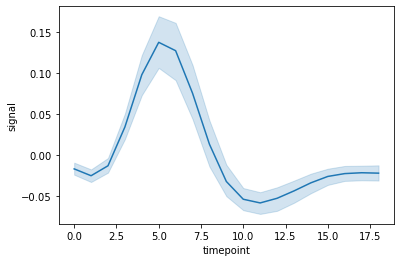

In [3]:
# Creating the line chart
sns.lineplot(x="timepoint", y="signal", data=fmri)

Text(0, 0.5, 'Percent Signal Change')

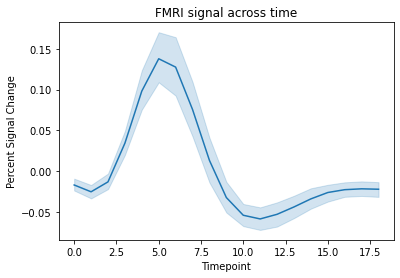

In [4]:
# Adding title and changing labels
# The labels we are working with are fine, but for demonstration purposes let's change them
sns.lineplot(x="timepoint", y="signal", data=fmri)

# As seaborn is built on matplotlib, we can use it to add titles and labels:
plt.title('FMRI signal across time')
plt.xlabel('Timepoint')
plt.ylabel('Percent Signal Change')

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

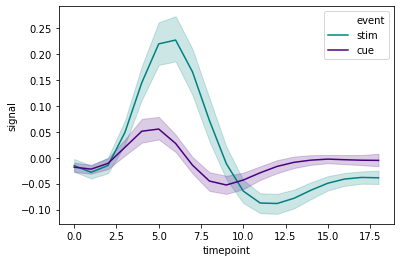

In [5]:
# We can plot two lines with different colours
# Specify which columns to produce the different coloured lines for
# We can also specify the colour palette, or specific colours
# More information here: https://seaborn.pydata.org/tutorial/color_palettes.html

sns.lineplot(x="timepoint", y="signal", hue="event", palette=['teal','indigo'], data=fmri)

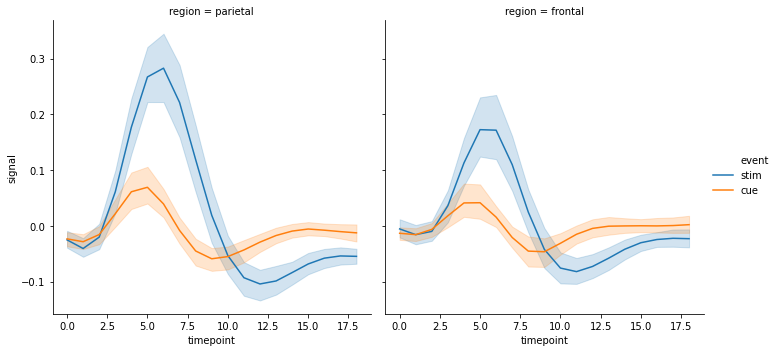

In [6]:
# Relplot - combine lineplot() and FacetGrid (Multi-plot grid for plotting conditional relationships)
# Gives us the ability to plot multiple line graphs on same scale for comparison
# Parameter 'col' will specify how to split the data onto the separate charts
# Parameter 'kind' - default is scatter, we are also able to select line
sns.relplot(x="timepoint", y="signal", col="region", hue="event", kind="line", data=fmri)

## Line charts: Matplotlib

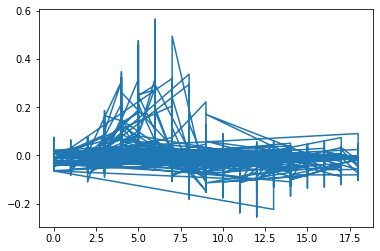

In [7]:
# When we try to plot the same chart in matplotlib, this is what we get, why is that?
# We get multiple signals for each timepoint, seaborn averages out the points for us
plt.plot(fmri.timepoint, fmri.signal)

In [8]:
# Matplotlib line plot is better for data which we want to see all of on the graph
# Let's create some new data in this format
new_df = pd.DataFrame({'years':[2014,2015,2016,2017,2018,2019,2020],
                       'sales':[4800,4900,5000,5700,6500,5000,6700]})
new_df.head()

,years,sales
0,2014,4800
1,2015,4900
2,2016,5000
3,2017,5700
4,2018,6500


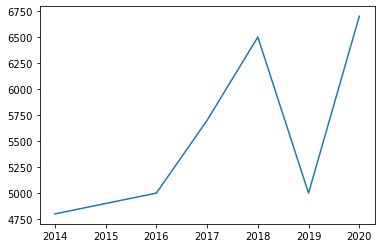

In [9]:
# Line plot using the new data
plt.plot(new_df.years,new_df.sales)

Text(0, 0.5, 'Sales')

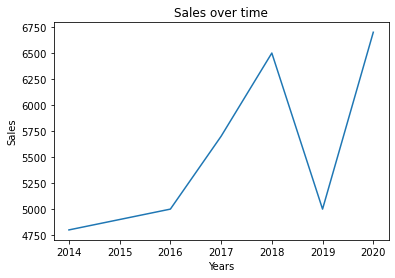

In [10]:
# Compared to the seaborn chart, we have no axis titles at all, let's add some in:
plt.plot(new_df.years,new_df.sales)
plt.title("Sales over time")
plt.xlabel("Years")
plt.ylabel("Sales")

## Bar Charts: Seaborn

In [11]:
# Let's load in a new dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='total_bill'>

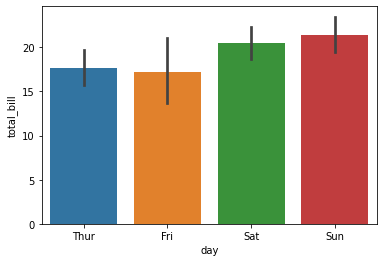

In [12]:
# Creating a simple bar chart
sns.barplot(x="day", y="total_bill", data=tips)

Text(0, 0.5, 'Total Bill')

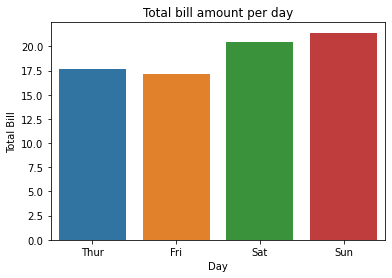

In [13]:
# Adding title and changing labels
# By default, the bar chart will include confidence intervals, we can turn them off
sns.barplot(x="day", y="total_bill", data=tips, ci=None)
plt.title("Total bill amount per day")
plt.xlabel("Day")
plt.ylabel("Total Bill")

<AxesSubplot:xlabel='total_bill', ylabel='day'>

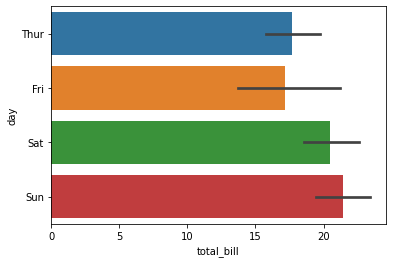

In [14]:
# We can change the orientation of the chart by changing which columns go to which labels
sns.barplot(x="total_bill", y="day", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

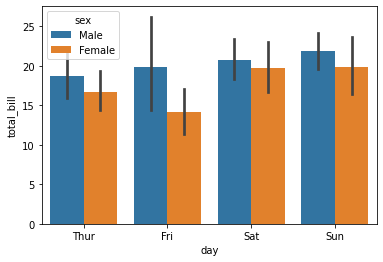

In [15]:
# Splitting the data up by sex, to see a comparison between male and female
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

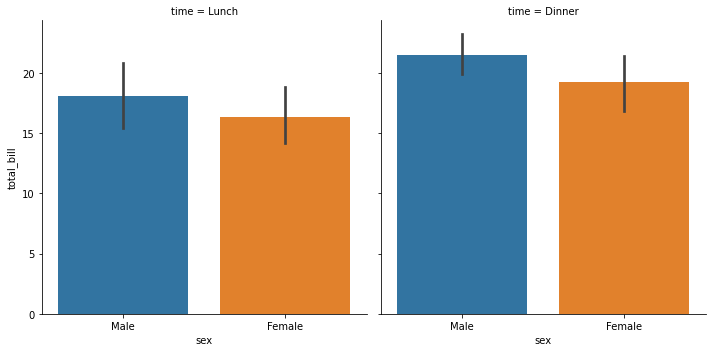

In [16]:
# Catplot - used for drawing categorical plots onto FacetGrid
# We can use this to compare categories by specifying kind='bar' 
# There are many different types of catplots we can create: 
# https://seaborn.pydata.org/generated/seaborn.catplot.html

sns.catplot(x="sex", y="total_bill", col="time", data=tips, kind="bar")

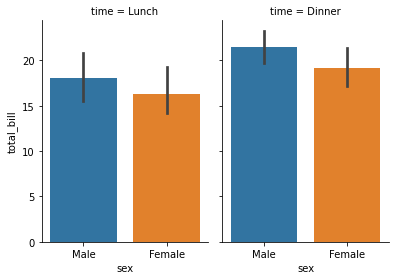

In [17]:
# To change the dimensions of the graph, we can change height and aspect
# height: Height (in inches) of each facet.
# aspect: Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches

sns.catplot(x="sex", y="total_bill", col="time", data=tips, kind="bar", height=4, aspect=.7)

## Bar Charts: Matplotlib

<BarContainer object of 244 artists>

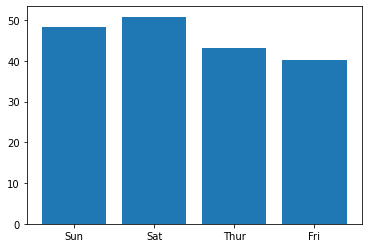

In [18]:
# Matplotlib bar chart for the same data
# We can see that with seaborn, we get a lot more right away, but we can customise these
plt.bar(tips.day,tips.total_bill)

Text(0, 0.5, 'Total bill amount')

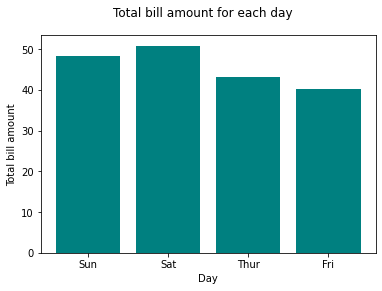

In [19]:
# Customisation
plt.bar(tips.day,tips.total_bill,color='teal') # changing colour
plt.suptitle("Total bill amount for each day") # Title for the chart
plt.xlabel("Day")
plt.ylabel("Total bill amount")

## Stacked bar chart: Matplotlib

In [20]:
# Let's see who tips more on average on each day
# Data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
# To make it easier to plot the graph, we need to play around with our data:
# First we split it up by male and female
male = tips[tips['sex'] == 'Male']
female = tips[tips['sex'] == 'Female']

# Then we group by day so that we can easily get the mean for each day
mday = male.groupby('day').mean()
fday = female.groupby('day').mean()

# To be able to find the proportions easily and have everything in one place, we will merge the two DataFrames
totals = mday.merge(fday, right_index=True, left_index=True)

# Creating a total column for tips 
totals['total'] = totals['tip_x'] + totals['tip_y']

# Calculating a percentage total for male and female for eah day
totals['prop_mal'] = np.true_divide(totals['tip_x'], totals['total']) * 100
totals['prop_fem'] = np.true_divide(totals['tip_y'], totals['total']) * 100

# Here is what we are left with
totals.head()

,total_bill_x,tip_x,size_x,total_bill_y,tip_y,size_y,total,prop_mal,prop_fem
day,,,,,,,,,
Thur,18.714667,2.980333,2.433333,16.715312,2.575625,2.468750,5.555958,53.642111,46.357889
Fri,19.857000,2.693000,2.100000,14.145556,2.781111,2.111111,5.474111,49.195202,50.804798
Sat,20.802542,3.083898,2.644068,19.680357,2.801786,2.250000,5.885684,52.396600,47.603400
Sun,21.887241,3.220345,2.810345,19.872222,3.367222,2.944444,6.587567,48.885192,51.114808


<BarContainer object of 4 artists>

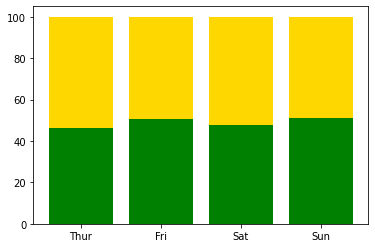

In [22]:
# Plotting the stacked bar chart
# The way this is differet to a normal bar chart is that we can specify 'bottom' 
# This will tell matplotlib where the bar should start from

plt.bar(totals.index,totals.prop_mal, label='Male',color='gold',bottom=totals.prop_fem)
plt.bar(totals.index,totals.prop_fem, label='Female',color='green')

## Histogram: Matplotlib

In [23]:
# Lets begin with creating some random data
# randn - return a sample (or samples) from the “standard normal” distribution
data = np.random.randn(100)
data

array([-1.1101639 , -0.06972687,  0.34689475,  1.16582059, -1.14286119,
       -2.37101799, -0.1828999 , -1.07784909, -0.0551665 ,  0.69260036,
        0.87523199,  0.09405742, -1.93769845, -1.133665  , -1.51617137,
        0.83097721, -0.9675992 ,  1.31045867,  0.3363502 , -0.30409251,
        0.0145931 , -1.24303057, -0.54098023, -0.17367723,  0.55203435,
        0.92198294, -0.09222452,  0.30457918,  0.87533328, -1.18982618,
        0.19312689, -1.87100597,  1.52859871, -0.65436789,  0.2025611 ,
        1.18357445, -0.77988614,  0.41547458, -0.17380728, -0.29886057,
        0.64986518, -0.66227946, -2.07851863,  0.32363644,  1.54050119,
       -0.39243671, -2.01432038, -1.09798885,  1.24990595, -0.16169042,
       -0.2297228 , -0.92688796, -0.17604762, -1.36340802,  0.31140013,
       -1.36448433, -1.2277384 , -0.83288472,  0.09144439, -0.87210023,
        0.18155972,  1.90744382,  0.78250327,  0.45721517, -0.03634264,
       -1.00049506, -0.83459285,  0.75042969, -0.20333377, -2.22

(array([ 5.,  4., 12., 11., 10., 22., 14., 10.,  7.,  5.]),
 array([-2.37101799, -1.94317181, -1.51532563, -1.08747945, -0.65963327,
        -0.23178709,  0.19605909,  0.62390528,  1.05175146,  1.47959764,
         1.90744382]),
 <BarContainer object of 10 artists>)

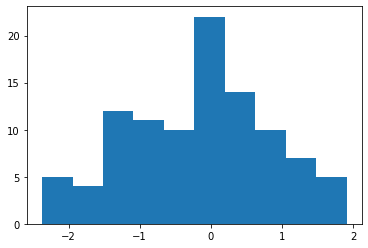

In [24]:
# Creating the histogram
plt.hist(data)

In [25]:
# Talk about the histogram - what is it doing?
# It plots frequency of values - it is a visualisation for the distribution of data

(array([ 2.,  5.,  2.,  5., 10.,  8.,  5., 16., 11., 11.,  6.,  7.,  6.,
         4.,  2.]),
 array([-2.37101799, -2.08578721, -1.80055642, -1.51532563, -1.23009484,
        -0.94486406, -0.65963327, -0.37440248, -0.08917169,  0.19605909,
         0.48128988,  0.76652067,  1.05175146,  1.33698224,  1.62221303,
         1.90744382]),
 <BarContainer object of 15 artists>)

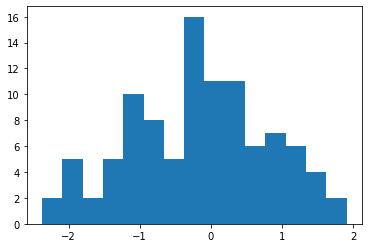

In [26]:
# We can change the number of bins
plt.hist(data,bins=15)

# See how this changes when you change the bin size to 5, or 50
# Need to find an appropriate size for the data
# In this example, 5 is too little and 50 is too many

Text(0.5, 0, 'Frequency of random values')

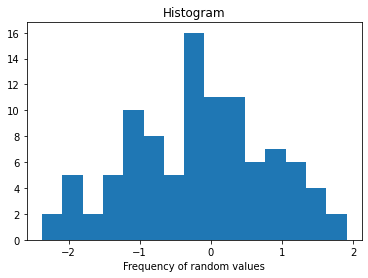

In [27]:
# Adding titles and labels
plt.hist(data,bins=15)
plt.title('Histogram') # Adding title
plt.xlabel('Frequency of random values') # Adding labels

(array([ 1.,  1.,  2.,  7.,  9., 13., 12., 15., 19.,  8.,  6.,  3.,  1.,
         2.,  1.]),
 array([-2.91738441, -2.51946411, -2.1215438 , -1.7236235 , -1.3257032 ,
        -0.92778289, -0.52986259, -0.13194229,  0.26597802,  0.66389832,
         1.06181862,  1.45973892,  1.85765923,  2.25557953,  2.65349983,
         3.05142014]),
 <BarContainer object of 15 artists>)

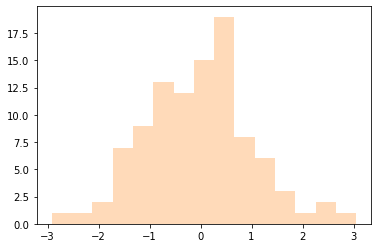

In [28]:
# We can change the colours

# creating more random data
data2 = np.random.randn(100)

plt.hist(data2,bins=15,color='peachpuff')

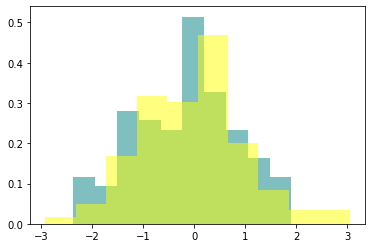

In [29]:
# Creating an overlapping density histogram
# Previously, we had counts, now we will look at density
# Changing alpha changes the opacity, allowing us to see the graphs overlapping 
plt.hist(data,color='teal',alpha=0.5,density=True)
plt.hist(data2,color='yellow',alpha=0.5,density=True)
plt.show()

## Seaborn distribution plot

<AxesSubplot:>

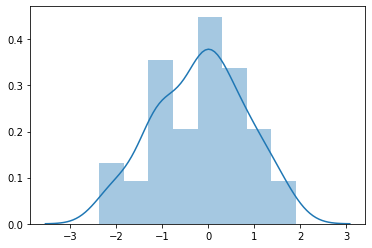

In [30]:
# Distribution plot in seaborn
sns.distplot(data)

## Jointplot: Seaborn

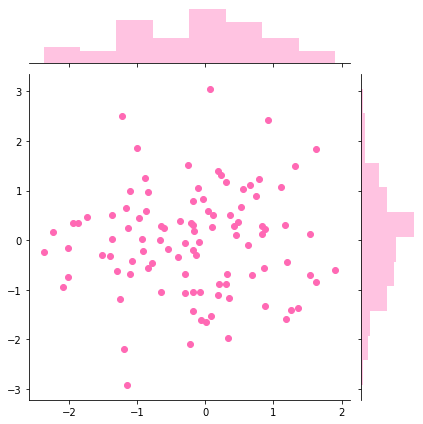

In [31]:
# Joint plot
# This creates a plot of two variables with bivariate and univariate graphs
# What does this mean? What is the plot showing?
# It is showing the histograms separately and a scatterplot of both variables
sns.jointplot(data,data2,color='hotpink')

## Plotting data

In [33]:
# Loading in data, we already know iris very well so we can jump into visualisations!
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


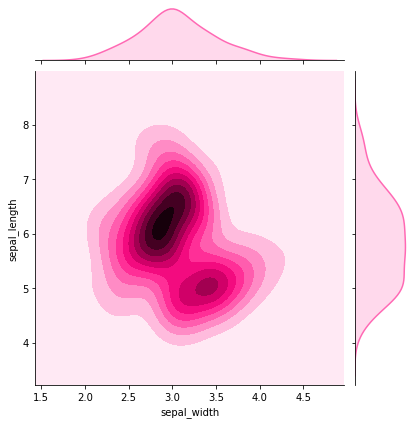

In [34]:
# Jointplot
# We can specify different types of plots for the joint plot
# Different kinds to pick from: scatter, reg, resid, kde, hex
# KDE: Kernel Density Estimate plot
sns.jointplot(iris['sepal_width'],iris['sepal_length'],color='hotpink',kind='kde')

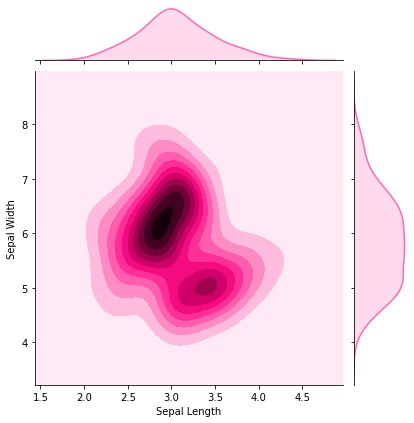

In [35]:
# Adding labels
# We can chain on a method that will change the axis labels
sns.jointplot(iris['sepal_width'],iris['sepal_length'],
              color='hotpink',kind='kde').set_axis_labels("Sepal Length","Sepal Width")

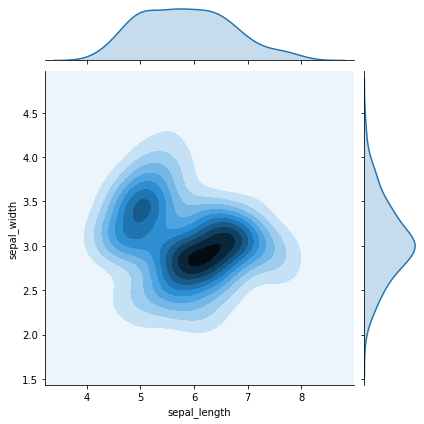

In [36]:
# We can also specify the x and y values directly
sns.jointplot(data=iris,x='sepal_length',y='sepal_width',kind='kde')

## Lab
- Plot different relationships between variables using different kinds of plots - do we get any patterns emerging?

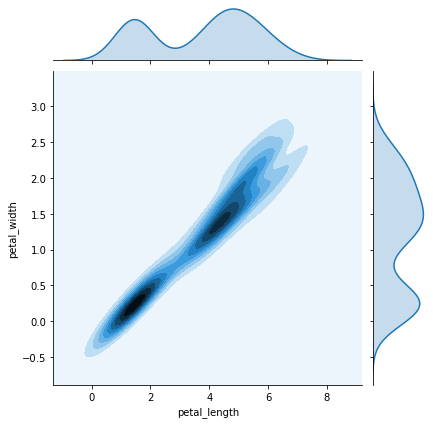

In [37]:
# From Lab: Plotting petal length and width
# What is going on? 
# Bi-modal distribution, there are two peaks, they also seem to overlap
# Why might that be?
# We have different species, so maybe one is much smaller than the other
sns.jointplot(data=iris,x='petal_length',y='petal_width',kind='kde')

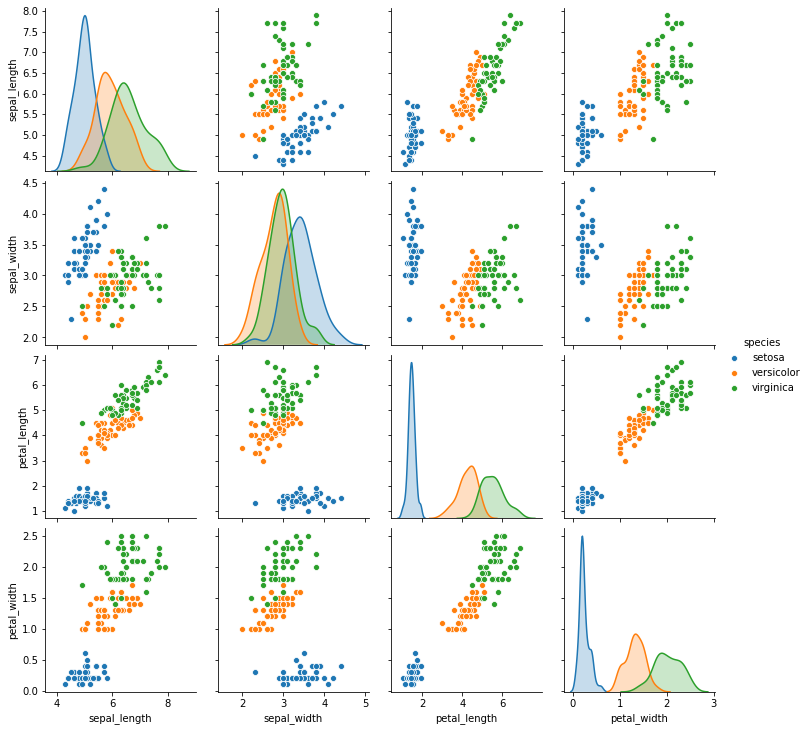

In [38]:
# Going into more detail - Pairplot (pairwise relationships is a dataset)
# By adding the parameter hue, each species will be given a different colour
# What can we see? - Setosa are quite different to the other two species
sns.pairplot(iris,hue='species')

## Scatterplots: Seaborn

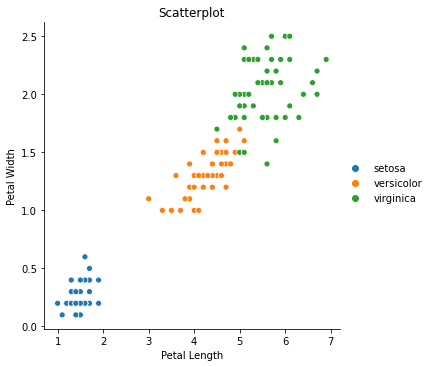

In [49]:
# Looking in more detail - Scatterplot
# We are adding hue for species so that each one will have a different colour
# We can also use set to add a title and change the axis labels
sns.relplot(
    data=iris,
    x='petal_length',
    y='petal_width',
    hue="species"
#    hue=iris.species.tolist()    <--- This gets past an error with matplotlib 3.3.1!
).set(
    title="Scatterplot",
    xlabel='Petal Length',
    ylabel='Petal Width')

In [43]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Scatterplots: Matplotlib

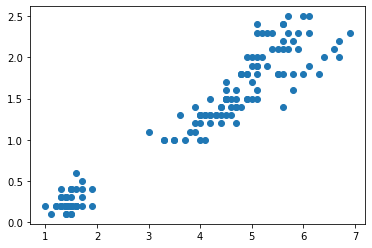

In [40]:
# If we were to plot a simple scatter, we are limited in what we can see:
# There is no easy way to colour by species to get the different categories in different colours
plt.scatter(iris['petal_length'],iris['petal_width'])

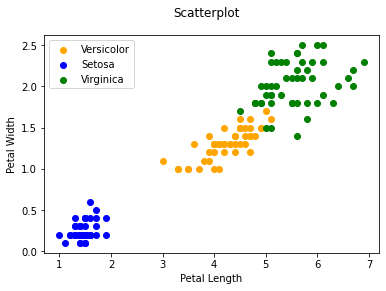

In [41]:
# Producing the same scatterplot in matplotlib - we need to do this differently

# Creating separate DataFrames, ready to plot
vers = iris[iris['species'] == 'versicolor']
setosa = iris[iris['species'] == 'setosa']
virg = iris[iris['species'] == 'virginica']

# Plotting each DataFrame separately, and showing them together on one plot
# We can set each one to a different colour
plt.scatter(vers.petal_length,vers.petal_width, c='orange')
plt.scatter(setosa.petal_length,setosa.petal_width, c='blue')
plt.scatter(virg.petal_length,virg.petal_width, c='green')

# Adding titles
plt.suptitle("Scatterplot")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

# Adding legend
plt.legend(labels=['Versicolor','Setosa','Virginica'])

## Linear Model Plot: Seaborn

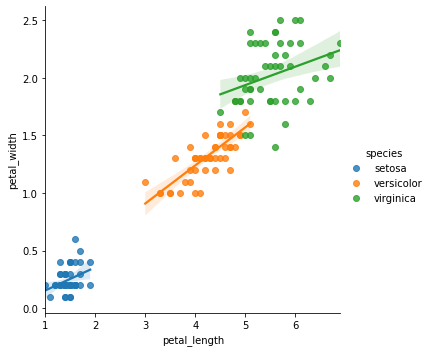

In [42]:
# Linear model plot
# This will plot a scatter and willtry to show variable relationships as well as providing lines of best fit
sns.lmplot(data=iris,x='petal_length',y='petal_width',hue='species')

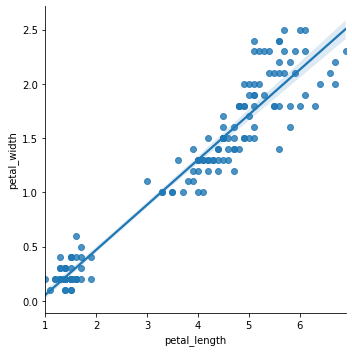

In [50]:
# If we take away hue, we can see the overall relationship
sns.lmplot(data=iris,x='petal_length',y='petal_width')

## Regression plot: Seaborn

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

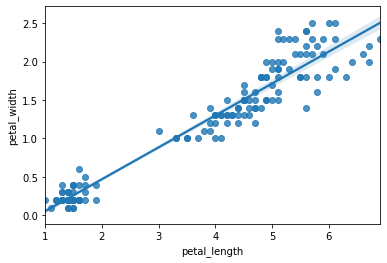

In [51]:
# Regression plot
# Plot data and a linear regression model fit
# Difference between lmplot: 
# lmplot combines regplot() and FacetGrid (multi-plot grid for relationships)
sns.regplot(data=iris, x='petal_length',y='petal_width')

## Heatmap: Seaborn

In [52]:
# Seaborn comes with datasets, let's use one - flights
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [53]:
# If we try to create a heatmap, it will not work because the data is in a long format
# We have the year and month as indices
# We need the data in a wide format
# How can we do that? - use pivot
fp = flights.pivot('year','month','passengers')  # index, columns, values
fp.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<AxesSubplot:xlabel='month', ylabel='year'>

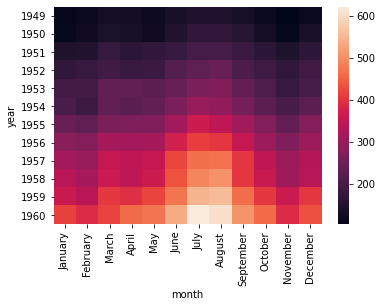

In [54]:
# We can now create a heatmap
sns.heatmap(fp)

<AxesSubplot:xlabel='month', ylabel='year'>

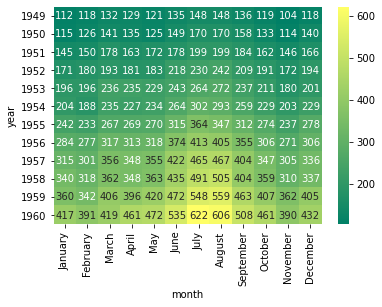

In [55]:
# Changing the colour palette and adding detail
sns.heatmap(fp,annot=True,fmt='d',cmap='summer')

## Clustermap: Seaborn
Plots a matrix dataset as a hierarchically-clustered heatmap

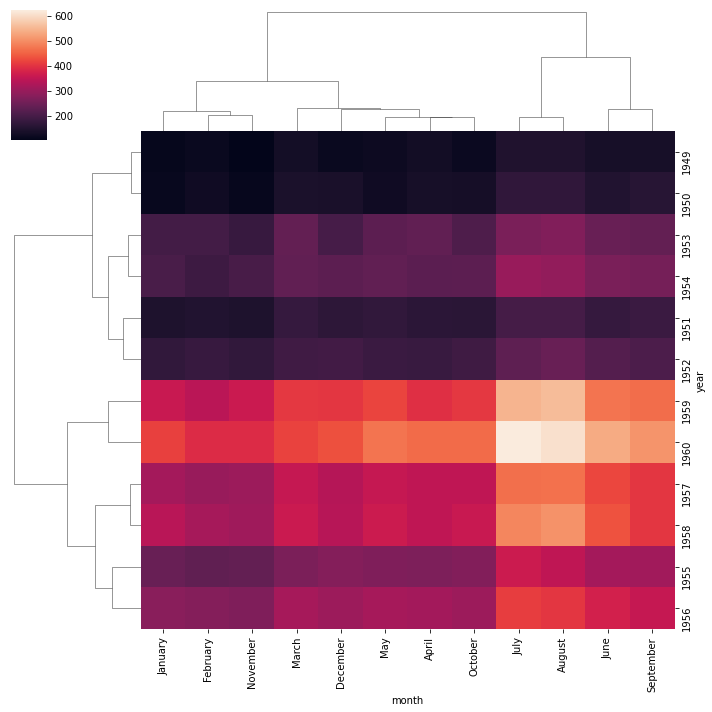

In [56]:
# Creating a clustermap on the pivoted flights data
# Note that the data are sorted so that similar clusters are adjacent
sns.clustermap(fp)

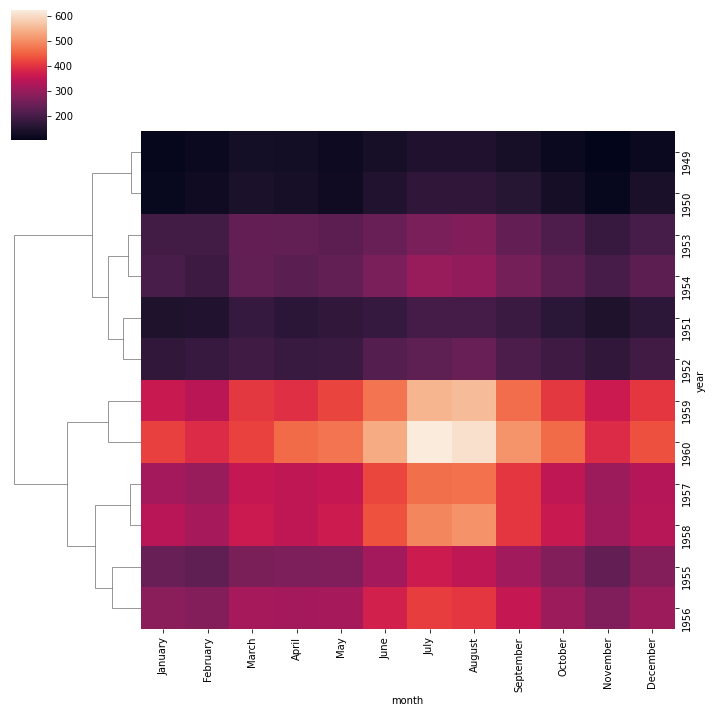

In [57]:
# By default, clustermap will create clusters for the rows and columns
# We can change that by specifying col_cluster or row_cluster as False
sns.clustermap(fp, col_cluster=False)

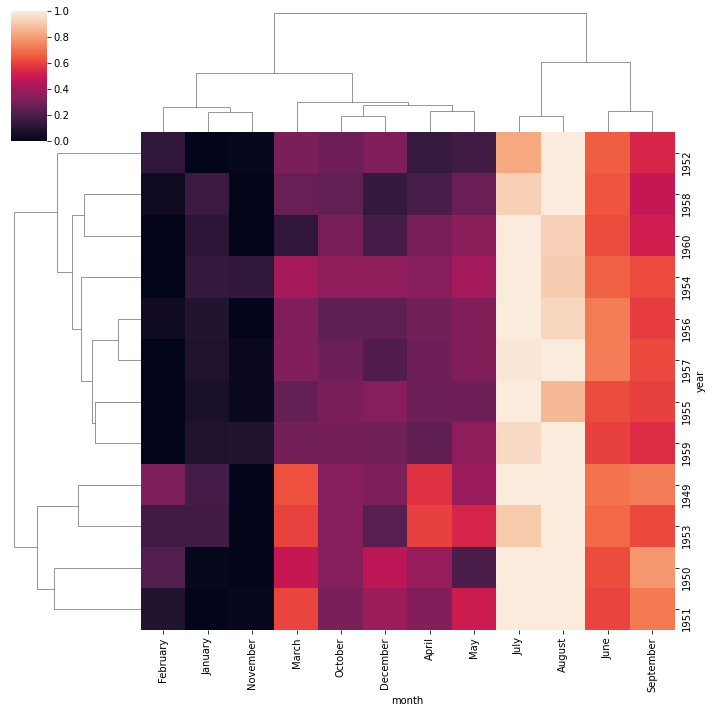

In [58]:
# We can also standardize the values in the rows or columns by using standard_scale
# 0 - rows, 1 - columns
sns.clustermap(fp, standard_scale=0)

## TreeMap: Matplotlib and squarify

In [60]:
import squarify    # pip install squarify (algorithm for treemap)

titanic = sns.load_dataset("titanic")

# Data
titanic.head()

# Changing data into usable format:
tg = titanic.groupby('class').sum()
tg

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,136,216,7111.42,90,77,18177.4125,119,109
Second,87,368,5168.83,74,70,3801.8417,99,104
Third,119,1473,8924.92,302,193,6714.6951,319,324


(0.0, 100.0, 0.0, 100.0)

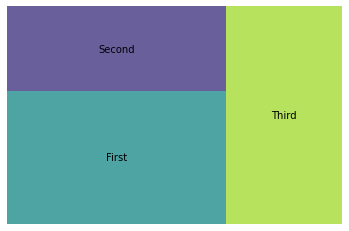

In [61]:
# Creating the treemap
squarify.plot(sizes=tg['survived'], label=tg.index, alpha=.8)
plt.axis('off')

## Donut chart: Matplotlib

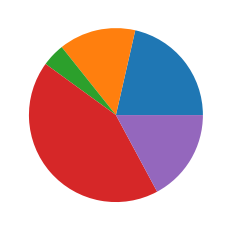

In [62]:
# A Donut (or doughnut) chart is essentially a pie chart with a white circle inside it
# and that is how it is created in python

# Creating data
size_of_groups=[15,10,3,30, 12]
 
# Creating a pie chart
plt.pie(size_of_groups)
plt.show()  # Using this will show just the chat, without all of the sdditional text output - makes it cleaner

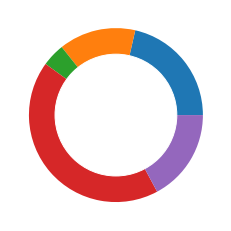

In [63]:
# Let's now create a pie chart and add a white circle in the middle

plt.pie(size_of_groups)

# Adding a circle in the middle
circle=plt.Circle((0,0), 0.7, color='white')

# gcf() - get current figure (a way to apply more methods to a figure we created)
fig = plt.gcf()

# Adding the white circle
fig.gca().add_artist(circle)

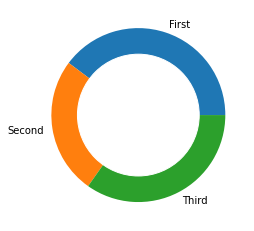

In [64]:
# Lets try it on the Titanic data
# We will add labels
# Note: All of these categories are similar in size, so pie chart might not be the best choice but this is for demo purposes
plt.pie(tg['survived'],labels=tg.index)
circle=plt.Circle((0,0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

## Useful resources:

https://seaborn.pydata.org/

https://matplotlib.org/

## Analysis Project:
Pick a dataset for the trainees to analyse (or let them find their own). Kaggle (https://www.kaggle.com/datasets) is a good place to find them. They should clean and analyse the dataset using Pandas DataFrames and packages like seaborn and matplotlib to create visualisations.

Example Datasets from Kaggle:

* Kickstarter projects: https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv
    * csv file, contains information about successful and failed kickstarter projects.
* Google Play Store Apps: https://www.kaggle.com/lava18/google-play-store-apps
     * 2 csv files - one contains information about the apps, the other contains user reviews. Possible to analyse single file, but gives room for joining and deeper analysis.
* Videogame Sales: https://www.kaggle.com/gregorut/videogamesales
    * csv file, contains information about videogames and sales in 4 different regions
* Book Review Ratings: https://www.kaggle.com/ruchi798/bookcrossing-dataset
    * 3 csv files - information about books, users, and ratings.